In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Load the pickled pandas object created in dutch-monitor.ipynb 

(@Mattijn: volgens mij niet daar aangemaakt. Graag referentie makefile toevoegen)

In [18]:
df = pd.read_pickle(r'selected_station_data_1930.pkl')
df.head()

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
year,,,,,,,,,
1930.0416,-64.0,-128.0,35.0,-61.0,-17.0,13.0,57.0,33.0,NaN
1930.1250,-391.0,-355.0,-238.0,-336.0,-343.0,-336.0,-351.0,-363.0,NaN
1930.2084,-231.0,-224.0,-106.0,-190.0,-213.0,-159.0,-151.0,-201.0,NaN
1930.2916,-235.0,-206.0,-92.0,-166.0,-239.0,-218.0,-209.0,-260.0,NaN
1930.3750,-190.0,-185.0,-56.0,-126.0,-204.0,-136.0,-132.0,-195.0,NaN


Principal component analysis is a fast and flexible unsupervised method to reduce the data dimension. Here we apply it to search for differences in local sea levels. The local sea levels measured at tide gauges are the 'variables'.


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


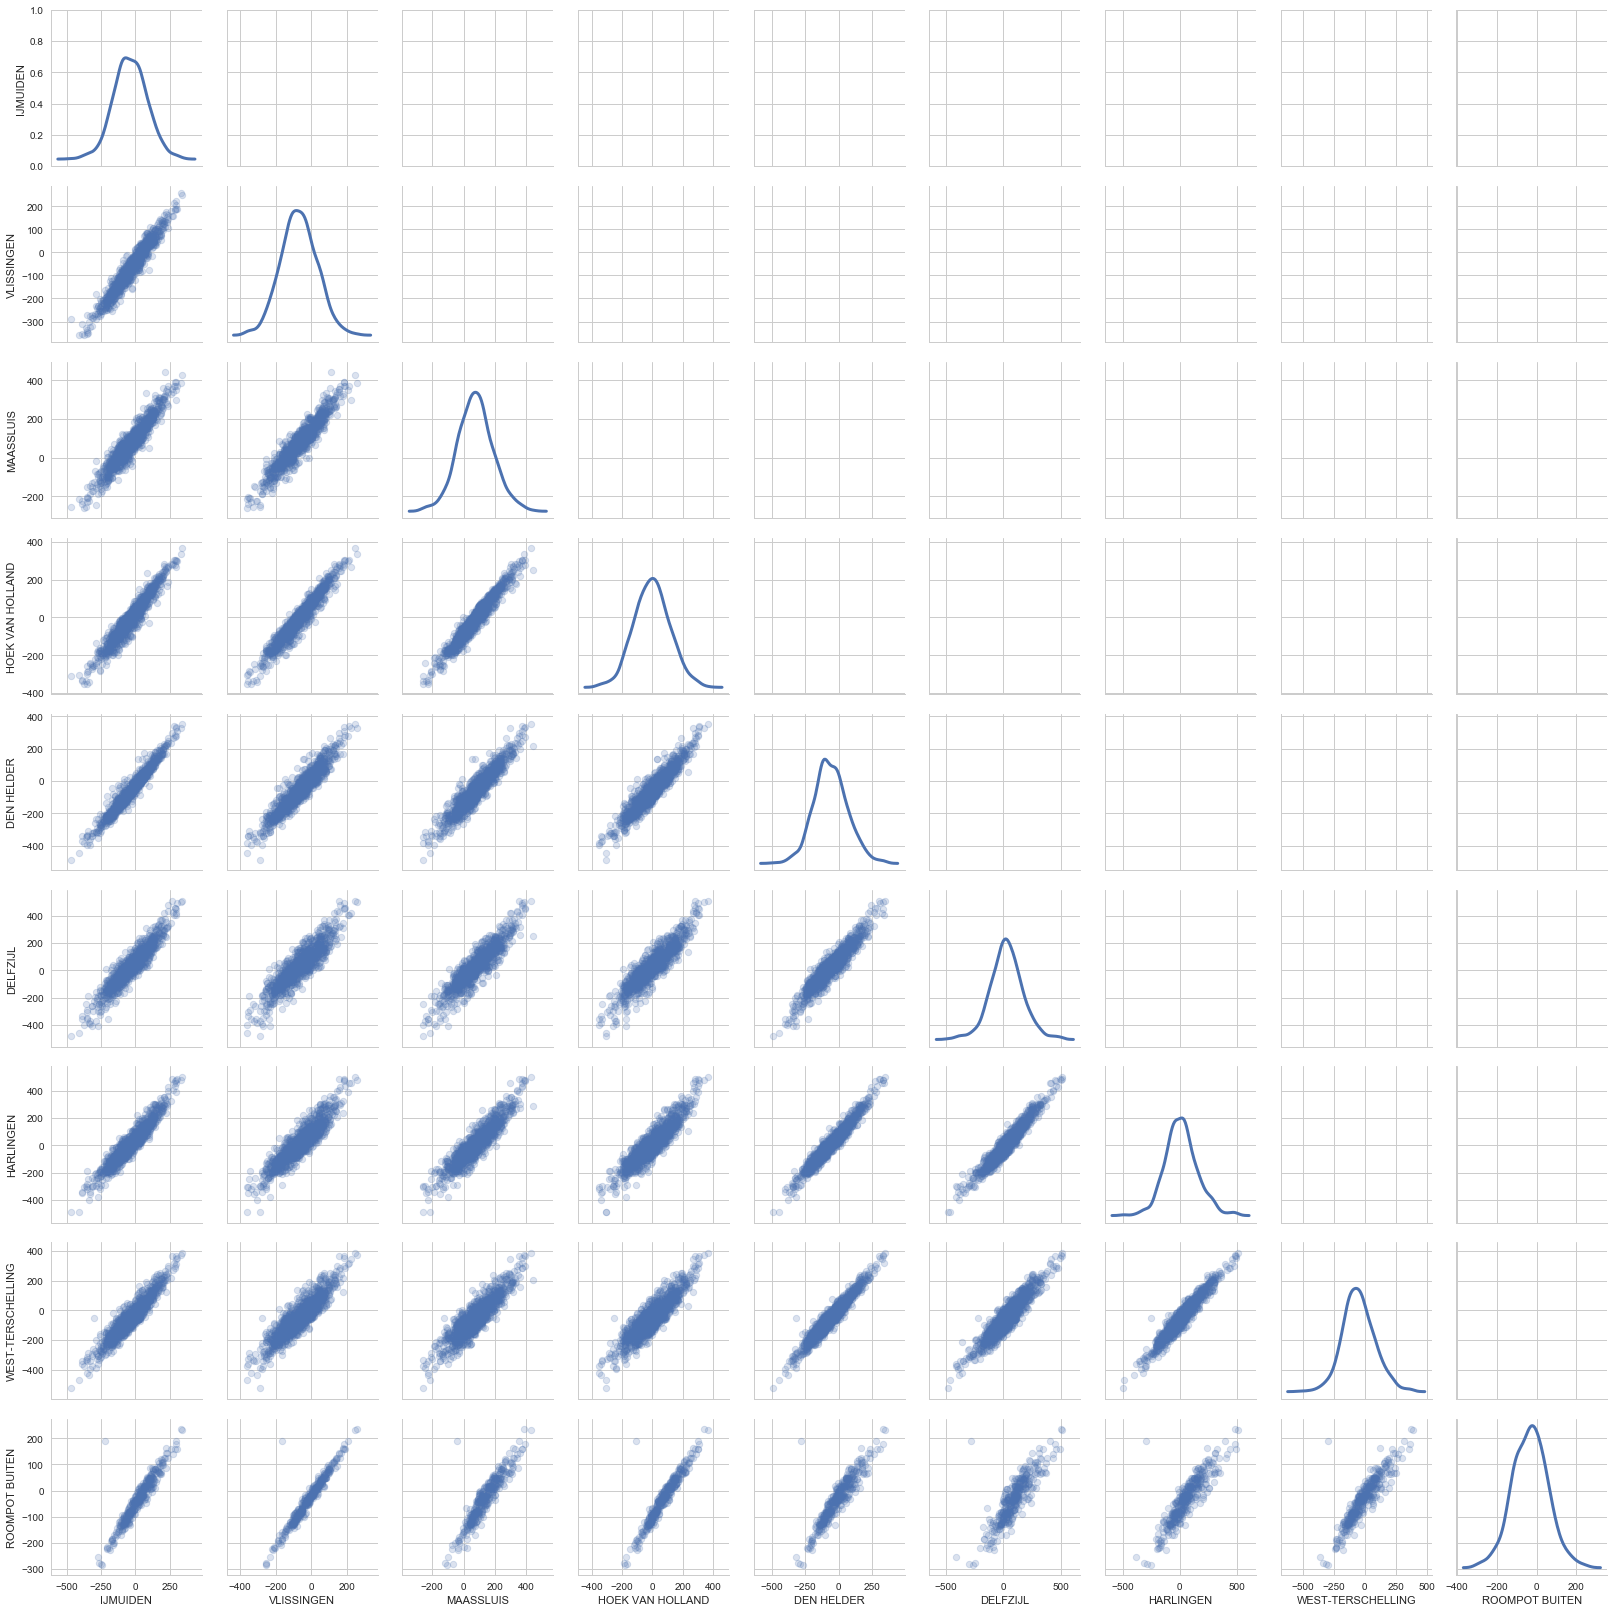

In [19]:
# exploratieve analyse van de dataset
g = sns.PairGrid(df)
g = g.map_lower(plt.scatter, linewidths=1, facecolor="#4C72B0", edgecolor="#4C72B0", s=40, alpha=0.2)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

In [20]:
# Laat het principe zien van de PCA analyse op twee stations
# converteer DataFrame naar Numpy matrix
X = df[['DELFZIJL','MAASSLUIS']].fillna(df.mean()).as_matrix()    #,

# berekening van gemiddelde voor tijdreeks van elk station
# berekening van standaard deviatie voor tijdreeks van elk station
# standardiseer de input datastroom
_mu = np.nanmean(X, axis=0)
_sigma = np.sqrt(np.nanmean((X - _mu) ** 2.0, axis=0))
X = (X - _mu) / _sigma    

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA fit yields indicators such as 'components' and 'explained variance'

In [21]:
pca.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [22]:
pca.explained_variance_

array([ 1.91108852,  0.08891148])

Plot the orthogonal components.

@Mattijn: graag aanvullen. Zijn dit nu de orthogonale componenten of toch iets anders. Later volgt namelijk nog een plot met de orthogonale componenten. 

Deze getallen kunnen uit worden gezet als vectoren over de originele input data. Waarbij de componenten gedefineerd worden als vectoren met een richting (gebruik makende van de `components_`) en een lengte (gebruik makende van de `explained_variance_`). Duidelijk te zien is de orthogonaliteit van de assen.

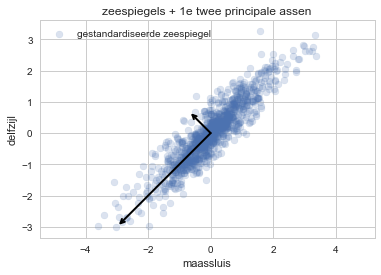

In [23]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label='gestandardiseerde zeespiegel')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.legend()
plt.xlabel('maassluis')
plt.ylabel('delfzijl')
plt.title('zeespiegels + 1e twee principale assen')
plt.show()

The projection of the points on these principal axes are the principal components of the data. The first two principal components can be used as axes for plotting the data.

#De projectie van elke punt op deze principale assen zijn de principale componenten van de data. De eerste twee principale componenten kunnen ook als assen gebruikt worden waarover de data geplot kan worden.

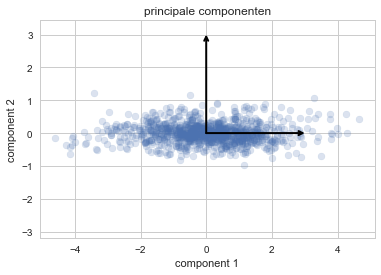

In [24]:
# plot principal components
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])
plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('principale componenten')
plt.show()

We expect that the first principal component explains the common part of the sea level. Or, in other words, the first component contributes for say 90% to the explained variance. Other components do not explain the variation in the sea level signal.

@Mattijn: wat doe je hier? Wat laat je zien?

#We verwachten dat het gezamenlijke deel van de zeespiegel wordt verklaard met de eerste principiale component. Zodoende kunnen we de dimensie reduceren door de verklaarde variantie van de overige componenten te negeren

@Mattijn: begrijp ik niet
Toegepast als navolging op bovenstaand voorbeeld op twee stations

In [25]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("orgineel formaat:       ", X.shape)
print("getransformeerd formaat:", X_pca.shape)

orgineel formaat:        (1044, 2)
getransformeerd formaat: (1044, 1)


De getransformeerde data is nu gereduceerd naar 1 dimensie. Voor een beter begrip kunnen we deze component projecteren op de op de orginele data. Alleen de verklarende variantie van de 1e component is gebruikt om de orginele punten op de 1e principale as te projecteren.

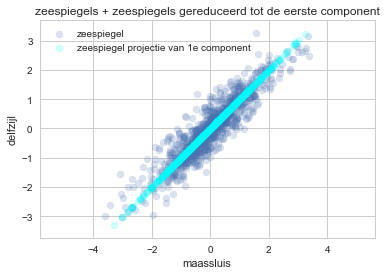

In [26]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label='zeespiegel')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2, color='cyan', label='zeespiegel projectie van 1e component')
plt.legend()
plt.axis('equal');
plt.xlabel('maassluis')
plt.ylabel('delfzijl')
plt.title('zeespiegels + zeespiegels gereduceerd tot de eerste component')
plt.show()

Tot hier hebben we de methode toegepast op twee stations (als in tweee parameters). Vervolgens kunnen we PCA ook toepassen op alle stations om een overzicht te krijgen van de algehele eigenvalues en (cumulatieve) verklarende variantie

In [27]:
from statsmodels.multivariate.pca import PCA
pca = PCA(df.fillna(df.mean()))

In [28]:
tot = np.ceil(sum(pca.eigenvals)).astype(int)
var_exp = np.array([(i / tot)*100 for i in pca.eigenvals])
cum_var_exp = np.cumsum(var_exp)
eigenvals_norm = np.array([i * 1/(tot/df.shape[1]) for i in pca.eigenvals])
tot_norm = np.ceil(sum(eigenvals_norm)).astype(int)
x_ = np.arange(1,int(tot_norm)+1,1)

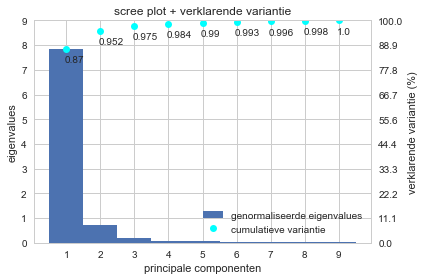

In [29]:
fig, axL = plt.subplots()

axL.bar(x_,eigenvals_norm, width=1, zorder=10, color="#4C72B0", label='genormaliseerde eigenvalues')
axL.set_xlim(1,9)
axL.set_ylim(0,tot_norm)
axL.set_xlabel('principale componenten')
axL.set_ylabel('eigenvalues')
axL.set_xticks(x_)

axR = axL.twinx()
axR.plot(x_,cum_var_exp,color='cyan',marker='o',ls='', label='cumulatieve variantie')
axR.set_ylim(0,100)
axR.set_ylabel('verklarende variantie (%)')
axR.set_yticks(np.around(np.linspace(axR.get_yticks()[0],axR.get_yticks()[-1],len(axL.get_yticks())),decimals=2))
axR.grid(None)

for i,label, in enumerate([str(np.round(i, 3)) for i in pca.rsquare[1:]]):    
    z = cum_var_exp
    axR.annotate(label,(x_[i]-0.05,z[i]-6))

# ask matplotlib for the plotted objects and their labels
lines, labels = axL.get_legend_handles_labels()
lines2, labels2 = axR.get_legend_handles_labels()
axL.legend(lines + lines2, labels + labels2, loc=4)

plt.title('scree plot + verklarende variantie')
plt.tight_layout()

plt.show()

Zoals gezegd splitsen we de zeespiegel op in een gezamenlijke deel en het individuele deel, waarbij we aannemen dat het gezamenlijke deel verklaard wordt door de eerste component en het individuele deel door de resterende componenten. Een handmatige functie is opgesteld om te laten zien wat er gebeurd en omdat in bestaande modules alleen `[:ncomp]` componenten geselecteerd kunnen worden. Het individuele deel kan daarmee niet afzonderlijk van het gezamenlijke deel opgesplitst worden (welke `[1:ncomp is]`).

In [30]:
def pca_handmatig(df, ncomp=[0]):
    """
    Handmatig toegepaste principale componenten analyse om de gezamenlijke en individuele deel op te spliten.
    Input DataFrame is gestandardiseerd
    principale componenten zijn genormaliseerd en output DataFrame is weer gedestandardiseerd.
    
    Parameters
    ----
    Input is:
    df    : pandas dataframe
    ncomp : is selectie van componenten
        # selecteer de te gebruiken eigenparen waarbij
        # [0] komt overeen met alleen de 1e principale component
        # [1] komt overeen met de 2e principale component
        # [0,1,2] komt overeen met de 1e, 2e en 3e principale component
        # [1,3] zijn een combinatie van de 2e en 4e principale component
    
    Output is:
    Pandas DataFrame met componenten toegepast   
    """
    
    # maak data array en set index en columns
    _index = df.index
    _columns = df.columns
    X = df.as_matrix()    
    
    # berekening van gemiddelde voor tijdreeks van elk station
    # berekening van standaard deviatie voor tijdreeks van elk station
    # standardiseer de input datastroom
    _mu = np.nanmean(X, axis=0)
    _sigma = np.sqrt(np.nanmean((X - _mu) ** 2.0, axis=0))
    X = (X - _mu) / _sigma    

    # bereken eigenvalues en eigenvectors gebruik makende van de SWO methode
    u, s, v = np.linalg.svd(X)
    eigenvals = s ** 2 # np.sqrt(coresponderende eigenvalue via covariance matrix) == singulaire waarde s
    eigenvecs = v.T # vectors worden 'column-wise' bepaald    

    # sorteer en bereken relevante statistieken op basis van de eigenvalues
    indices = np.argsort(eigenvals)
    indices = indices[::-1] # sorteer eigenvalues van hoog naar laag
    eigenvals = eigenvals[indices]
    eigenvecs = eigenvecs[:, indices]    

    # selecteer de te gebruiken eigenparen waarbij
    # [0] komt overeen met alleen de 1e principale component
    # [1] komt overeen met de 2e principale component
    # [0,1,2] komt overeen met de 1e, 2e en 3e principale component
    # [1,3] zijn een combinatie van de 2e en 4e principale component
    #ncomp = [1] 
    eigenvals=eigenvals[ncomp]    
    eigenvecs=eigenvecs[:,ncomp]  

    # bepaal de arrays van principale componenten
    factors = X.dot(eigenvecs)   

    # selecteer correct aantal componenten om te retourneren
    loadings = eigenvecs # V
    coeff = eigenvecs.T # V'   
    
    # normaliseer de principale componenten
    coeff = (coeff.T * np.sqrt(eigenvals)).T
    factors = factors / np.sqrt(eigenvals)    

    # projecteer input datastroom op de geselecteerde principale componenten
    # destandardiseer projectie naar input datastroom 
    # (sinds PCA is uitgevoerd op gestandaardiseerde datastroom)
    projection = factors.dot(coeff)
    projection *= _sigma
    projection += _mu    

    df_projected = pd.DataFrame(projection, columns=_columns, index=_index)    
    
    return df_projected

In [31]:
# slice de bron dataset om Roompot Buiten eruit te filteren sinds de vele NaN waarden
df_sel = df.ix[:,0:-1]
ncomp = [0] # gebruik alleen de 1e principale component 
pca_gezamenlijk = pca_handmatig(df_sel, ncomp)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


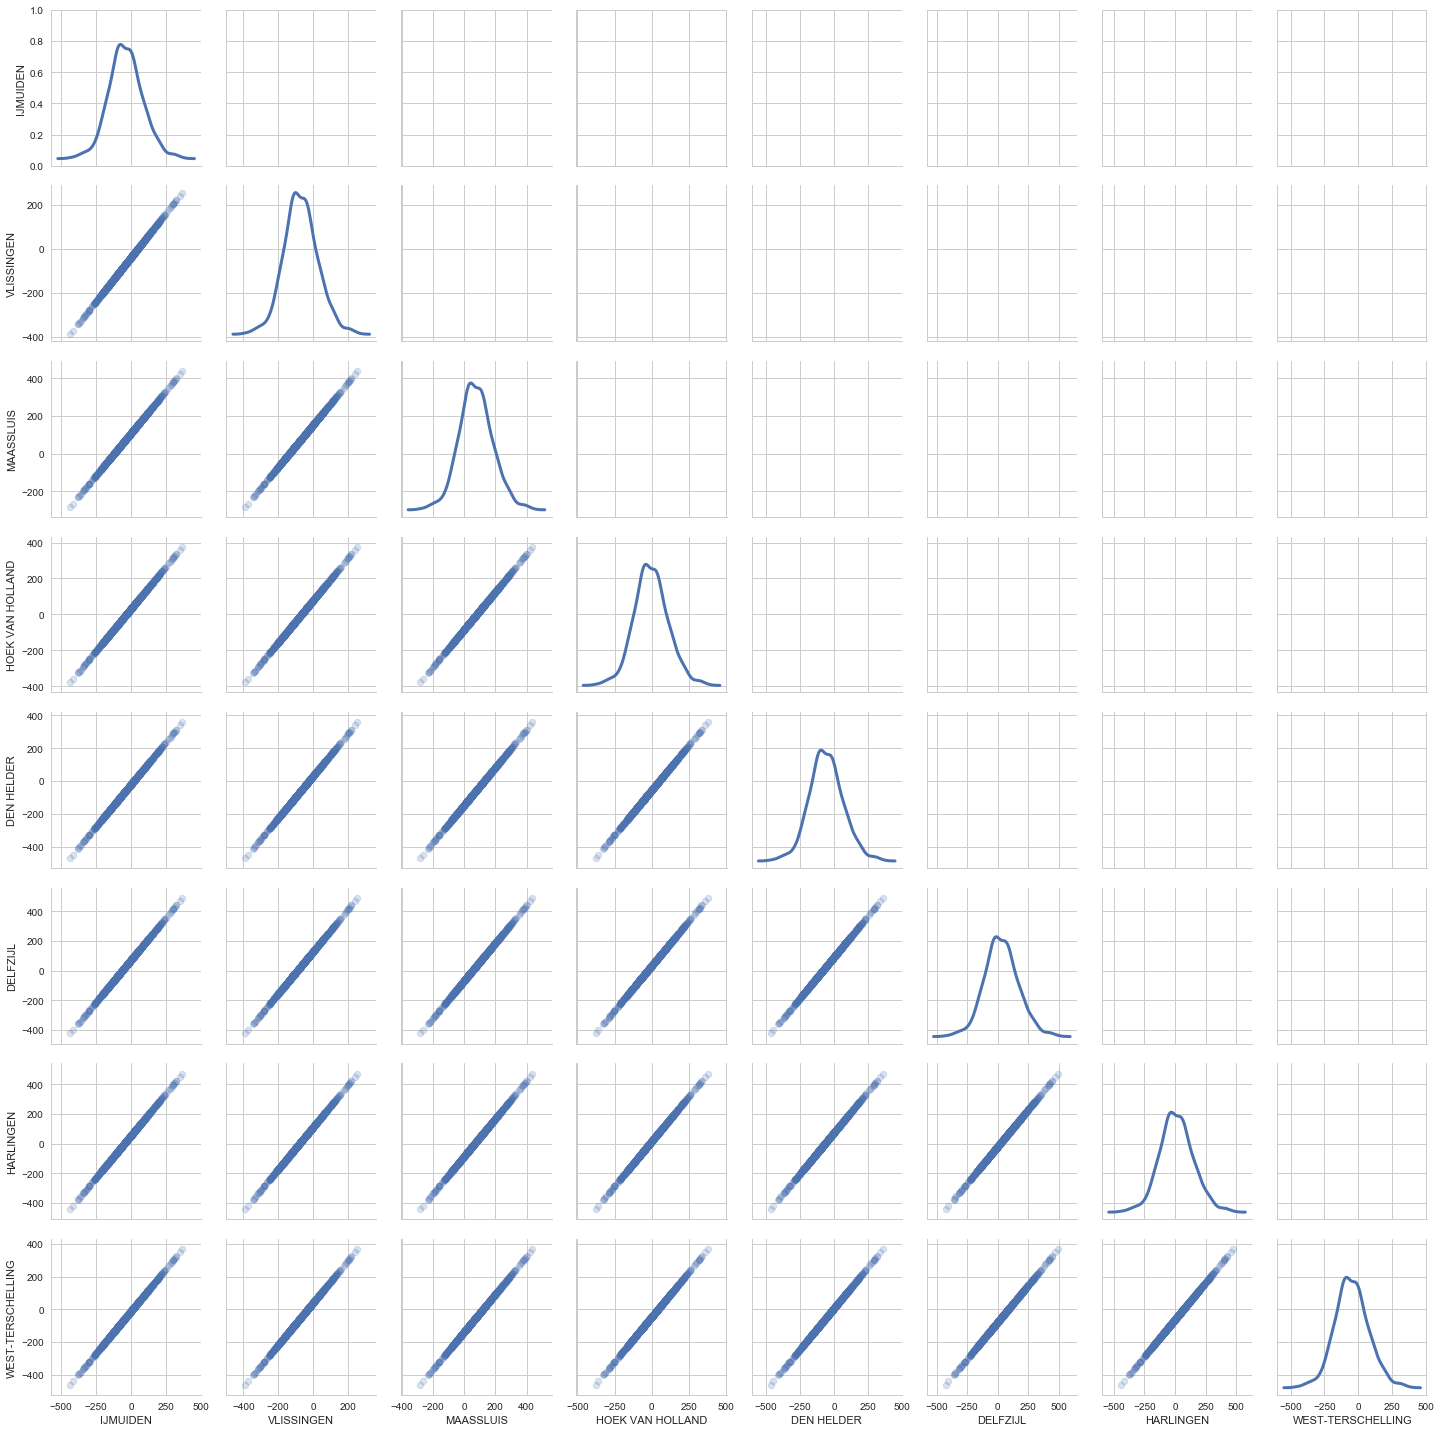

In [32]:
g = sns.PairGrid(pca_gezamenlijk)
g = g.map_lower(plt.scatter, linewidths=1, facecolor="#4C72B0", edgecolor="#4C72B0", s=40, alpha=0.2)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

In [33]:
# gebruik de resterende componenten exclusief component 1 
ncomp = np.arange(1,df_sel.shape[1]) 
print (ncomp)
pca_individueel = pca_handmatig(df_sel, ncomp)

[1 2 3 4 5 6 7]


Visalisatie van de geprojecteerde componenten van het individuele deel op de orginele dataset

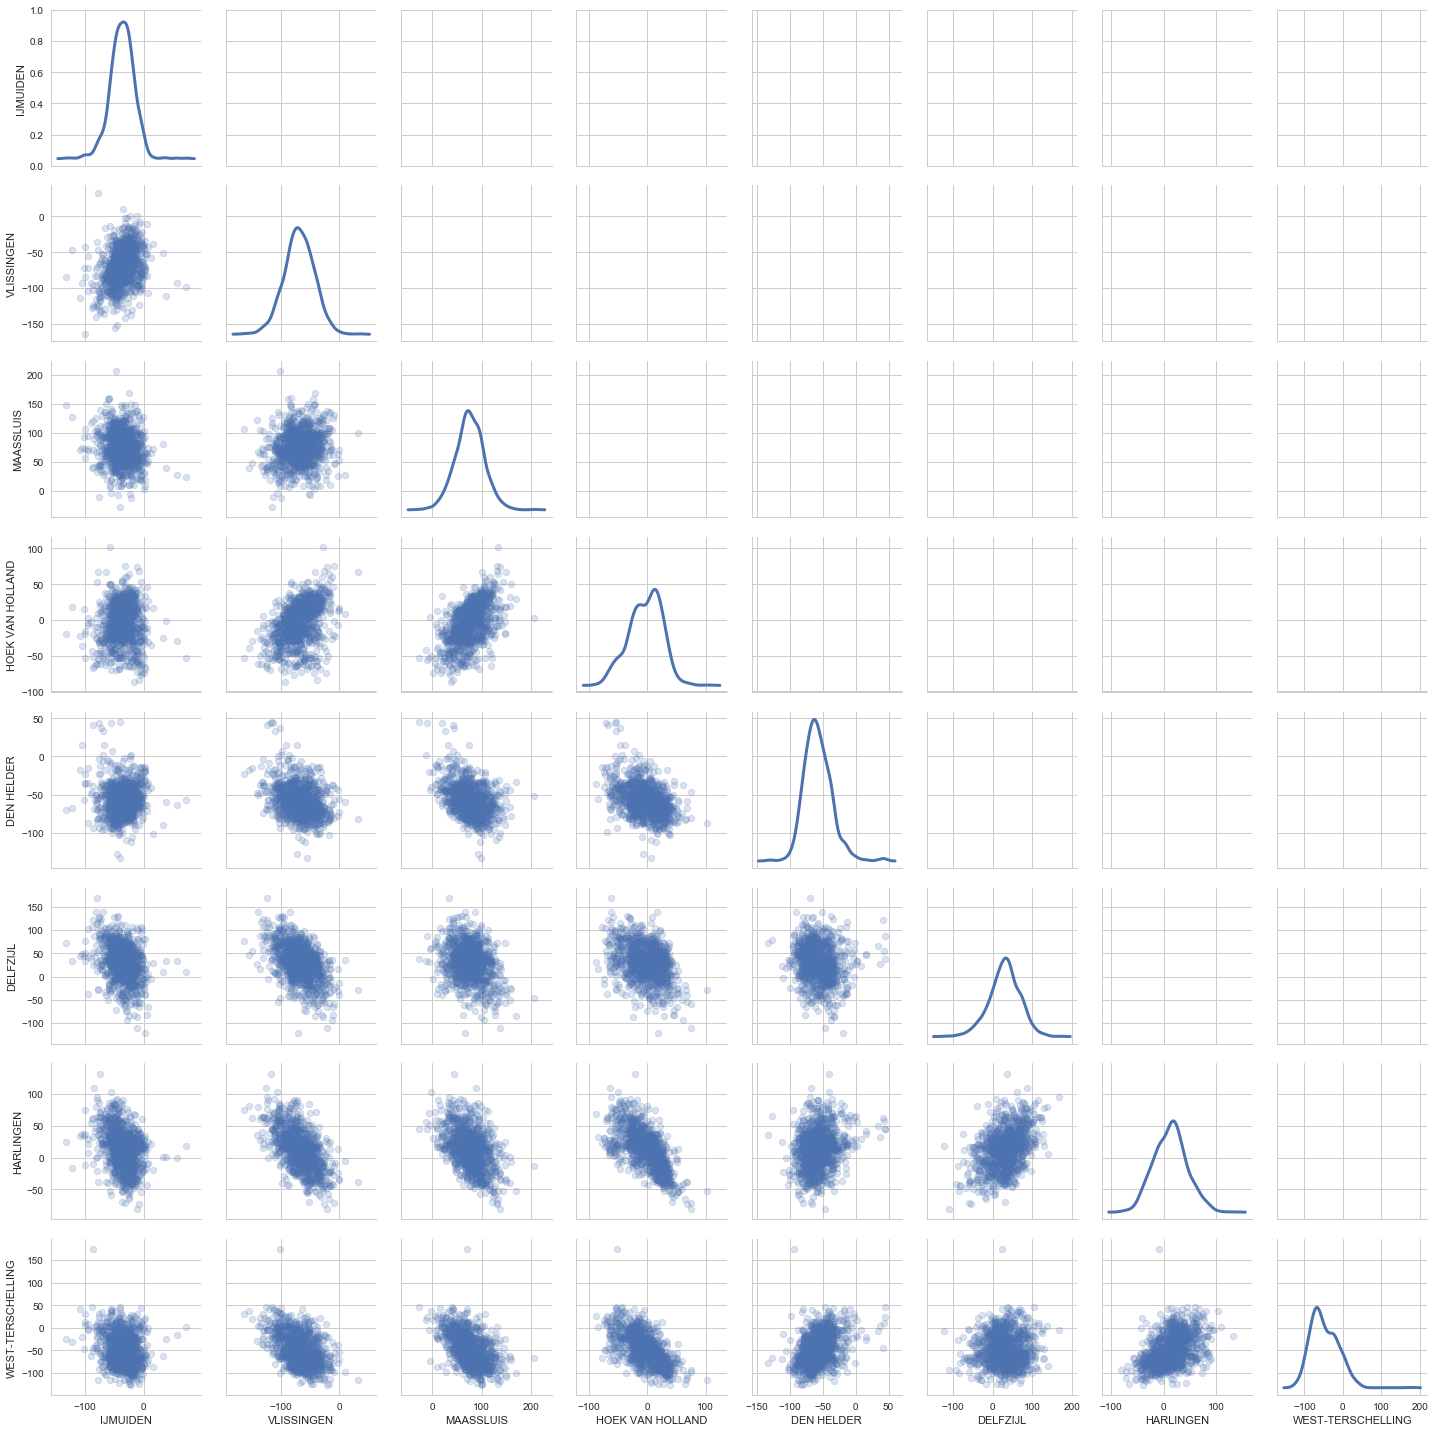

In [34]:
g = sns.PairGrid(pca_individueel)
g = g.map_lower(plt.scatter, linewidths=1, facecolor="#4C72B0", edgecolor="#4C72B0", s=40, alpha=0.2)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

Uiteenzetting van het gemiddelde over de stations van de orginele data, het gezamenlijk deel en het individuele deel

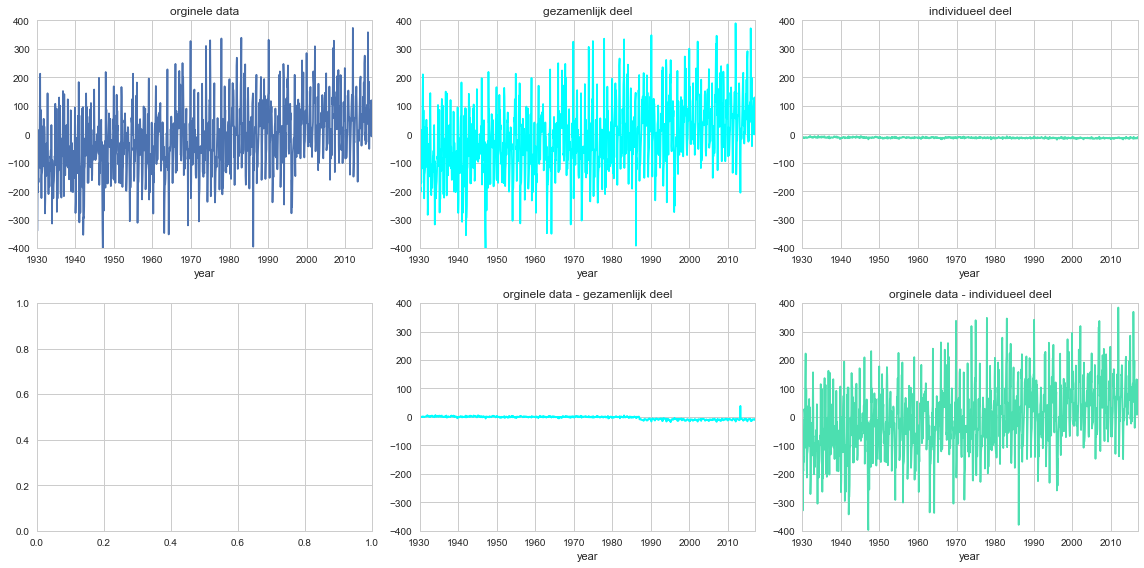

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

df.mean(axis=1).plot(ax=axes[0,0], alpha=1, ylim=[-400,400], title='orginele data')
pca_gezamenlijk.mean(axis=1).plot(ax=axes[0,1], color="cyan", alpha=1,ylim=[-400,400], title='gezamenlijk deel')
pca_individueel.mean(axis=1).plot(ax=axes[0,2],color="#4CDFB0", ylim=[-400,400], title='individueel deel')

(df.mean(axis=1)-pca_gezamenlijk.mean(axis=1)).plot(ax=axes[1,1], color="cyan", alpha=1,ylim=[-400,400], title='orginele data - gezamenlijk deel')
(df.mean(axis=1)-pca_individueel.mean(axis=1)).plot(ax=axes[1,2], color="#4CDFB0", alpha=1,ylim=[-400,400], title='orginele data - individueel deel')
plt.tight_layout()
plt.show()

Vervolgens voeren we hetzelfde statistische model uit welke de heer Baart uitvoert in zijn jupyter notebook

In [36]:
df_mean = pd.DataFrame(data=dict(year=df.index, height=df.mean(axis=1)))
pca_gezamenlijk_mean = pd.DataFrame(data=dict(year=pca_gezamenlijk.index, height=pca_gezamenlijk.mean(axis=1)))
pca_individueel_mean = pd.DataFrame(data=dict(year=pca_individueel.index, height=pca_individueel.mean(axis=1)))
pca_gezamenlijk_mean.head()

,height,year
year,,
1930.0416,-20.062864,1930.0416
1930.1250,-340.708059,1930.1250
1930.2084,-186.204544,1930.2084
1930.2916,-201.816221,1930.2916
1930.3750,-153.237698,1930.3750


In [37]:
import statsmodels.api as sm

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [38]:
# define the statistical model
def linear_model(df, with_wind=True, with_season=True):
    y = df['height']
    X = np.c_[
        df['year']-1970, 
        np.cos(2*np.pi*(df['year']-1970)/18.613),
        np.sin(2*np.pi*(df['year']-1970)/18.613)
    ]
    month = np.mod(df['year'], 1) * 12.0
    names = ['Constant', 'Trend', 'Nodal U', 'Nodal V']
    if with_wind:
        X = np.c_[
            X, 
            df['u2'],
            df['v2']
        ]
        names.extend(['Wind U^2', 'Wind V^2'])
    if with_season:
        for i in range(11):
            X = np.c_[
                X,
                np.logical_and(month >= i, month < i+1)
            ]
            names.append('month_%s' % (i+1, ))
    X = sm.add_constant(X)
    model = sm.OLS(y, X, missing='drop')
    fit = model.fit()
    return fit, names

In [39]:
fit_org, names_org = linear_model(df_mean, with_wind=False, with_season=False)
fit_pca_gzl, names_pca_gzl = linear_model(pca_gezamenlijk_mean, with_wind=False, with_season=False)
fit_pca_idv, names_pca_idv = linear_model(pca_individueel_mean, with_wind=False, with_season=False)

In [40]:
pd.DataFrame(np.array([fit_org.aic,fit_pca_gzl.aic,fit_pca_idv.aic]), index=['orgineel','PCA gezamenlijk','PCA individueel'], columns=['AIC'])

,AIC
orgineel,12773.466376
PCA gezamenlijk,12785.115572
PCA individueel,4153.856212


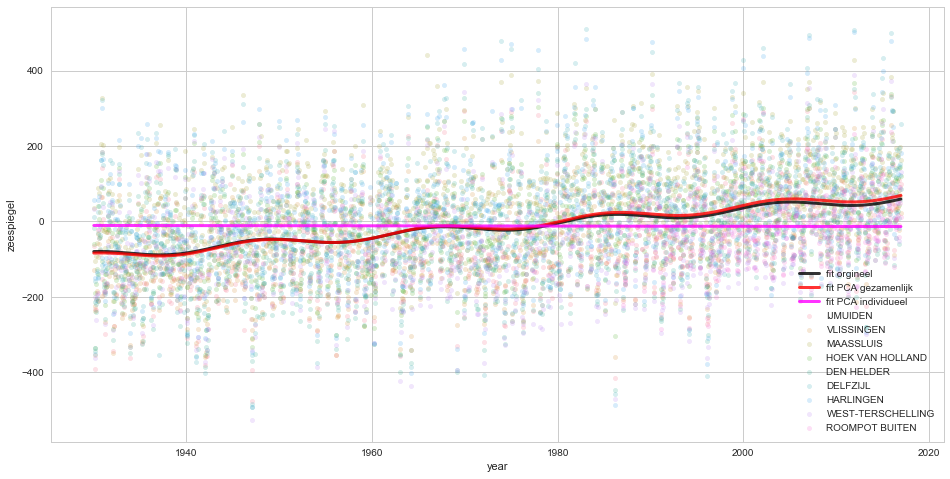

In [41]:
# kleuren voor de stations
colors = sns.color_palette("husl", df.columns.size)

# plot de fit van de orginele data in het lineare model
fig, ax = plt.subplots(figsize=(16,8))
for ix, column in enumerate(df.columns):
    df.reset_index().plot(x='year',y=column,kind='scatter', ax=ax, alpha=0.2,color=colors[ix], label=column)
ax.plot(fit_org.model.exog[:, 1] + 1970, fit_org.predict(), linewidth=3, alpha=0.8, color='k', label='fit orgineel')
ax.plot(fit_pca_gzl.model.exog[:, 1] + 1970, fit_pca_gzl.predict(), linewidth=3, alpha=0.8, color='r', label='fit PCA gezamenlijk')
ax.plot(fit_pca_idv.model.exog[:, 1] + 1970, fit_pca_idv.predict(), linewidth=3, alpha=0.8, color='magenta', label='fit PCA individueel')
ax.set_ylabel('zeespiegel')
ax.legend()
plt.show()

In [42]:
print ('trend org:',fit_org.params.x1*100.0/10,'cm/century\ntrend pca_gzl',fit_pca_gzl.params.x1*100.0/10,'cm/century\ntrend pca_idv',fit_pca_idv.params.x1*100.0/10,'cm/century')

trend org: 17.5999264395 cm/century
trend pca_gzl 19.2386129351 cm/century
trend pca_idv -0.34335377465 cm/century


In de notebook van de heer Baart wordt de PCA uitgevoerd op het eerste discrete verschil van de DataFrame om vervolgens een cumulatieve sommatie te doen over enkel station IJmuiden. In de uitleg wordt gesproken wordt over alle stations dus dit is waarschijnlijk een foutje. 

Ook het toepassen van de PCA op het eerste discrete verschil en nadien een cumulatieve somatie zal geen verschil maken in de trend enkel het nul-punt verschuift omhoog. 

Zie hieronder:

In [43]:
diffs = df.diff()
# slice de bron dataset
_diffs = diffs.iloc[1::]
_diffs = _diffs.ix[:,0:-1]
pca_dif = pca_handmatig(_diffs, [0])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [44]:
df_dif = pd.DataFrame(data=dict(year=df.index[1:],  height=np.cumsum(pca_dif).mean(axis=1)))
fit_dif, names_dif = linear_model(df_dif, with_wind=False, with_season=False)

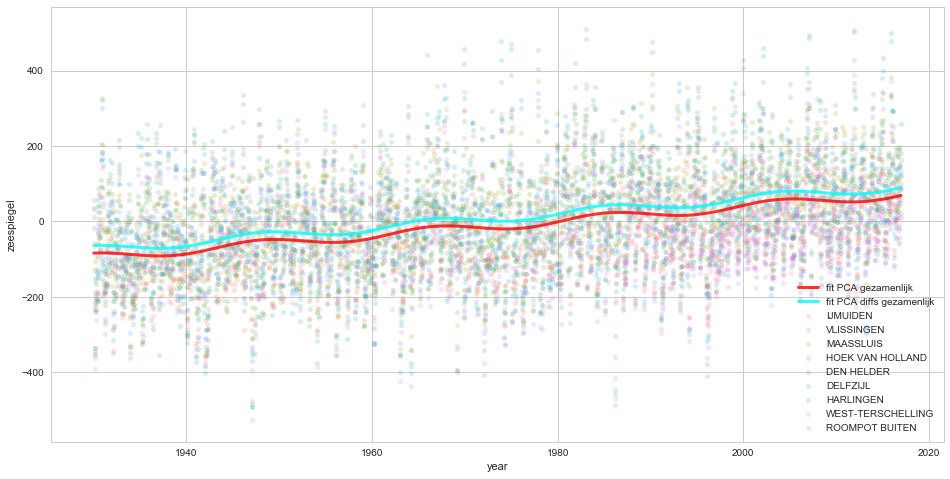

In [45]:
# kleuren voor de stations
colors = sns.color_palette("husl", df.columns.size)

# plot de fit van de orginele data in het lineare model
fig, ax = plt.subplots(figsize=(16,8))
for ix, column in enumerate(df.columns):
    df.reset_index().plot(x='year',y=column,kind='scatter', ax=ax, alpha=0.2,color=colors[ix], label=column)
#ax.plot(fit_org.model.exog[:, 1] + 1970, fit_org.predict(), linewidth=3, alpha=0.8, color='k', label='fit orgineel')
ax.plot(fit_pca_gzl.model.exog[:, 1] + 1970, fit_pca_gzl.predict(), linewidth=3, alpha=0.8, color='r', label='fit PCA gezamenlijk')
#ax.plot(fit_pca_idv.model.exog[:, 1] + 1970, fit_pca_idv.predict(), linewidth=3, alpha=0.8, color='magenta', label='fit PCA individueel')
ax.plot(fit_dif.model.exog[:, 1] + 1970, fit_dif.predict(), linewidth=3, alpha=0.8, color='cyan', label='fit PCA diffs gezamenlijk')
ax.set_ylabel('zeespiegel')
ax.legend()
plt.show()